# Bound system
<img src="animation1_b.gif" width="500" align="right">
<br>
We hereby present a simulation of one bound system of two stars with same mass $m = 0.5\ \text{IU}$ with IU = Internal Units both moving with a constant velocity $v_z = 0.5 \ \text{IU}$. <br>
In this brief overview we tried to show the results one can infer by comparing the simulated behaviour of a bound system with the Analytical Solution provided by Newton

## Initial data choice
To better understand the choice of our initial datas, we first have to show the conversion we used to go from Internal Units to the cgs system.<br>
From the definition of *centripetal force*<br><br>
$$ f_\text{cp} = \dfrac{v^2}{r} = \dfrac{GM}{r^2}$$
<br>
we define the following *adimensional quantity* for our conversion
<br><br>
$$ \bigg(\dfrac{GM}{rv^2}\bigg)_\text{iu} = \bigg(\dfrac{GM}{rv^2}\bigg)_\text{cgs} $$
<br>
Since the quantity is derived from the centripetal force we decided to use the mass ratios and distance from the Earth-Sun system, interpreting $m_\text{iu} = 1 = 1\ M_\odot$. From which
$$
\dfrac{m_\text{cgs}}{m_\text{iu}} = 2 \times 10^{33} \qquad \dfrac{r_\text{cgs}}{r_\text{iu}} = 1.49 \times 10^{13}
$$
From which we find
$$
\dfrac{v_\text{cgs}}{v_\text{iu}} = 3 \times 10^6\
$$

### Intepreting the data

The initial data set that we have chosen to simulate a bound system is the following, expressed in internal units:

| Object | Mass      |   x   |   y   |   z   | vx       | vy       | vz       |
|--------|-----------|-------|-------|-------|----------|----------|----------|
|   1    |     1     |   0   |  0.5  |   0   |   -0.5   |     0    |    0.5    |
|   2    |     1     |   0   |  -0.5 |   0   |    0.5   |     0    |    0.5    |


Which in cgs units translates to:

| Object | Mass (g) | x (cm) | y (cm) | z (cm) | v_x (cm/s) | v_y (cm/s) | v_z (cm/s) |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | 2 x 10^33 | 0 | 7.4 x 10^12 | 0 | -1.5 x 10^6 | 0 | 1.5 x 10^6 |
| 2 | 2 x 10^33 | 0 | -7.4 x 10^12 | 0 | 1.5 x 10^6 | 0 | 1.5 x 10^6 |


We have set up the total time of the simulation to be of 10 IU and the ouput to be printed every 0.01 UI, to have enought data to be confronted with the theoretical model.
<br>

This represents a configuration of two masses that initially lie on the origin, opposite one to another on the y axis, with opposite velocities on the x axis, and with a net velocity on the z axis.

### Why is it a bound state?
Generally, we can calculate wether a state is bound or not by simply imposing the total energy to be negative $E < 0$.<br>
We will prove this by calculating the total energy as<br>

$$
E_\text{tot} = \sum_{i} \dfrac{1}{2}m_{i}v_i^2 - \sum_{i \ne j} G\ \dfrac{m_i m_j}{(\vec{r_i} - \vec{r_j})^2} \hat r_{ij}
$$

And comparing the result with the effective potential solution.

## Fetching the data
Data fetching and extrapolating is pretty strightforward, the variables pertaining the two objects will be stored in dictionaries

In [1]:
import numpy as np
import pandas as pd

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

In [2]:
lines = pd.read_csv('out_data_b.txt').to_numpy()

t = lines[0::4].astype(float)
a_1 = lines[1::4]
a_2 = lines[2::4]
N_particles = lines[3::4].astype(int)

mxv_1 = np.array([x.split(' ') for x in a_1.ravel()],dtype=float)
mxv_2 = np.array([x.split(' ') for x in a_2.ravel()],dtype=float)

print(t.shape)
#print(mxv_1)
#print(mxv_2)
#print(N_particles)

(999, 1)


Here we reshape the strings mxv_1 and mxv_2 and store their quantities in the dictionaries

In [3]:
m_1 = {
    "m": mxv_1[:,0],
    "x": mxv_1[:,1:4][:,0],
    "y": mxv_1[:,1:4][:,1],
    "z": mxv_1[:,1:4][:,2],
    "pos": mxv_1[:,1:4],
    "v_x": mxv_1[:,4:8][:,0],
    "v_y": mxv_1[:,4:8][:,1],
    "v_z": mxv_1[:,4:8][:,2],
    "vel": mxv_1[:,4:8]
}

m_2 = {
    "m": mxv_2[:,0],
    "x": mxv_2[:,1:4][:,0],
    "y": mxv_2[:,1:4][:,1],
    "z": mxv_2[:,1:4][:,2],
    "pos": mxv_2[:,1:4],
    "v_x": mxv_2[:,4:8][:,0],
    "v_y": mxv_2[:,4:8][:,1],
    "v_z": mxv_2[:,4:8][:,2],
    "vel": mxv_2[:,4:8]
}

#print(m_1["z"])

## Results
We can use basic physics concept to calculate the important physical quantities out of this simulation to better understand what we are seeing.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

## Separation distance
As the name says, here the distance $d$ between the two objects is computed and later plotted as a function of time

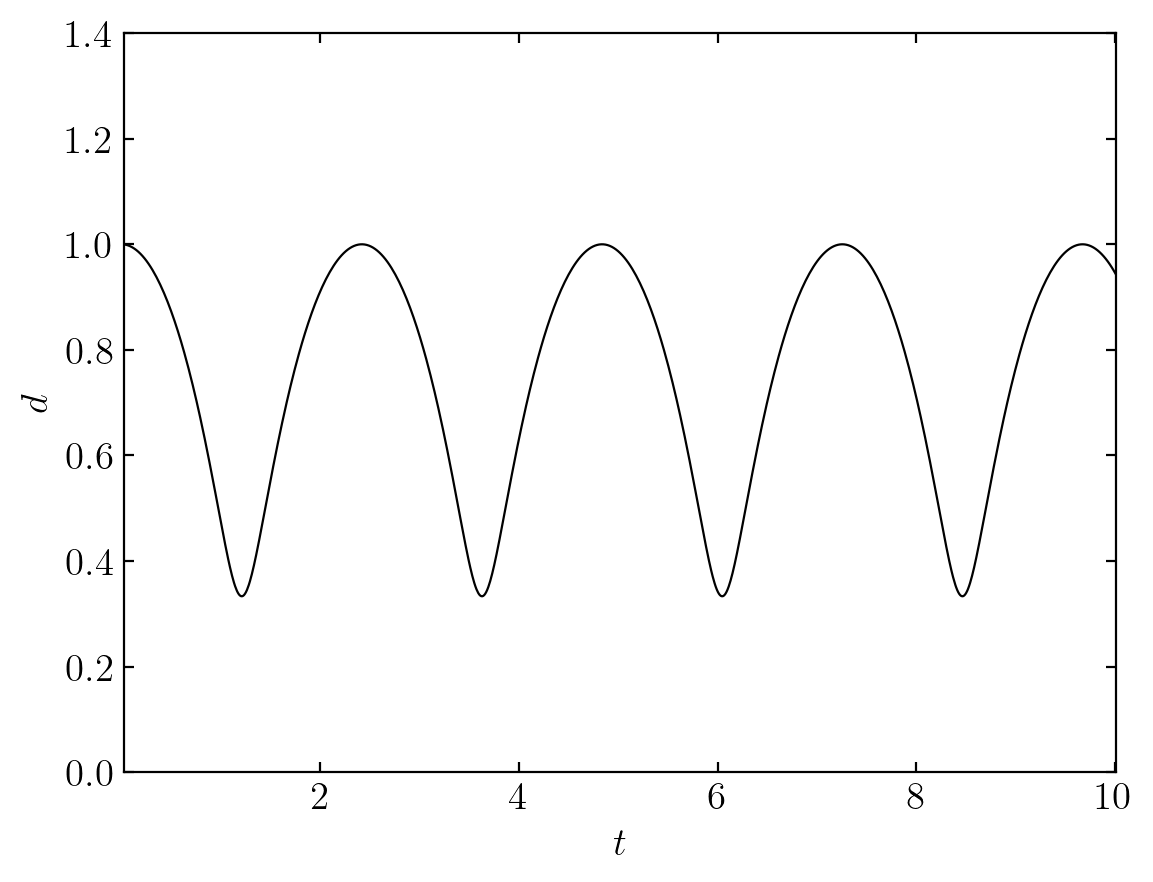

In [5]:
# plotting the distance
def dist(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)

d = dist(m_1['x'], m_1['y'], m_1['z'], m_2['x'], m_2['y'], m_2['z'])
plt.plot(t, d, c = 'black', lw = .8)
plt.ylim([0,1.4])

plt.xlabel(r'$t$')
plt.ylabel(r'$d$')

plt.show()

## Omega

To calculate the angular frequency of the binary we use Kepler's 3rd law

$$ \omega = \sqrt{\dfrac{m_1 m_2}{d}} $$

We can use this variable to compute the angular momentum of the system

$$ L = \mu \omega d^2 $$

and the mass normalized angular momentum

$$ l = L/\mu = \omega d^2 $$

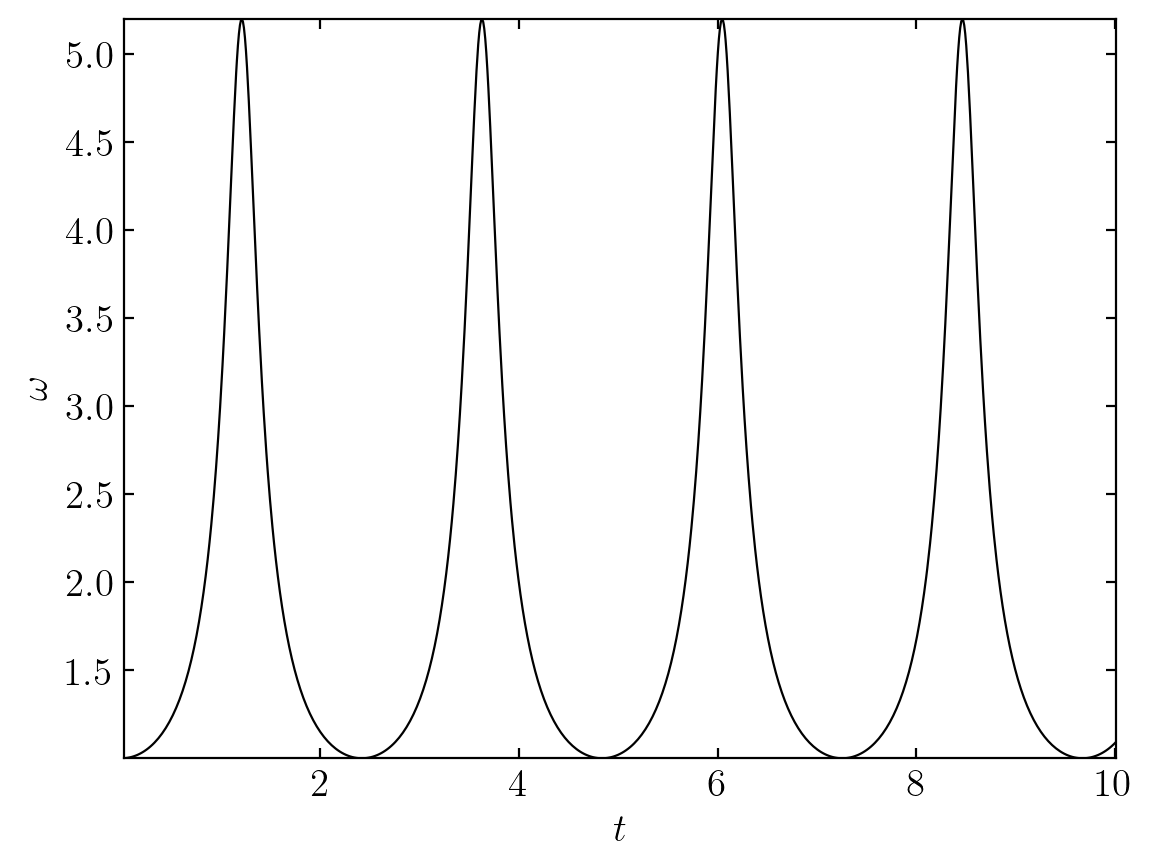

In [6]:
omega = np.sqrt(m_1['m']*m_2['m']/d**3) #G=1
M  = m_1['m'] + m_2['m']
mu = m_1['m'] * m_2['m']/M

L = mu*d**2*omega #constant = sqrt(m_1*m_2)
L = L[0]
l = L/mu[0]

plt.plot(t, omega, c = 'black', lw = .8)

plt.xlabel(r'$t$')
plt.ylabel(r'$\omega$')

plt.show()

## The potential

The most important part, actually showing that the system is indeed bound. To calculate the total energy we use the coding power to calculate 

$$ E_\text{tot} = \sum_{i} \dfrac{1}{2}m_{i}v_i^2 - \sum_{i \ne j} G\ \dfrac{m_i m_j}{(\vec{r_i} - \vec{r_j})^2} \hat r_{ij} $$

And then we can use the *effective potential* derived by reducing our 3D system to a simple 1D one, by virtue of the *angular momentum conservation* and *energy conservation*. This ***equivalent system*** is represented by a binary system where the center of mass is at the origin and a body with reduced mass $\mu$ is orbiting around it.<br>
Using a bit of calculus one can then rewrite the potential energy in the newfound coordinate system.

$$ U(d) = - \dfrac{m_1m_2}{d} + \dfrac{L^2}{2 \mu d^2}$$

Using our initial conditions we substitute the values of the physical quantities in the total mechanical energy equation and obtain $ E = \frac{1}{4} - \frac{3}{4} = -0.5 $, which is exactly what we find

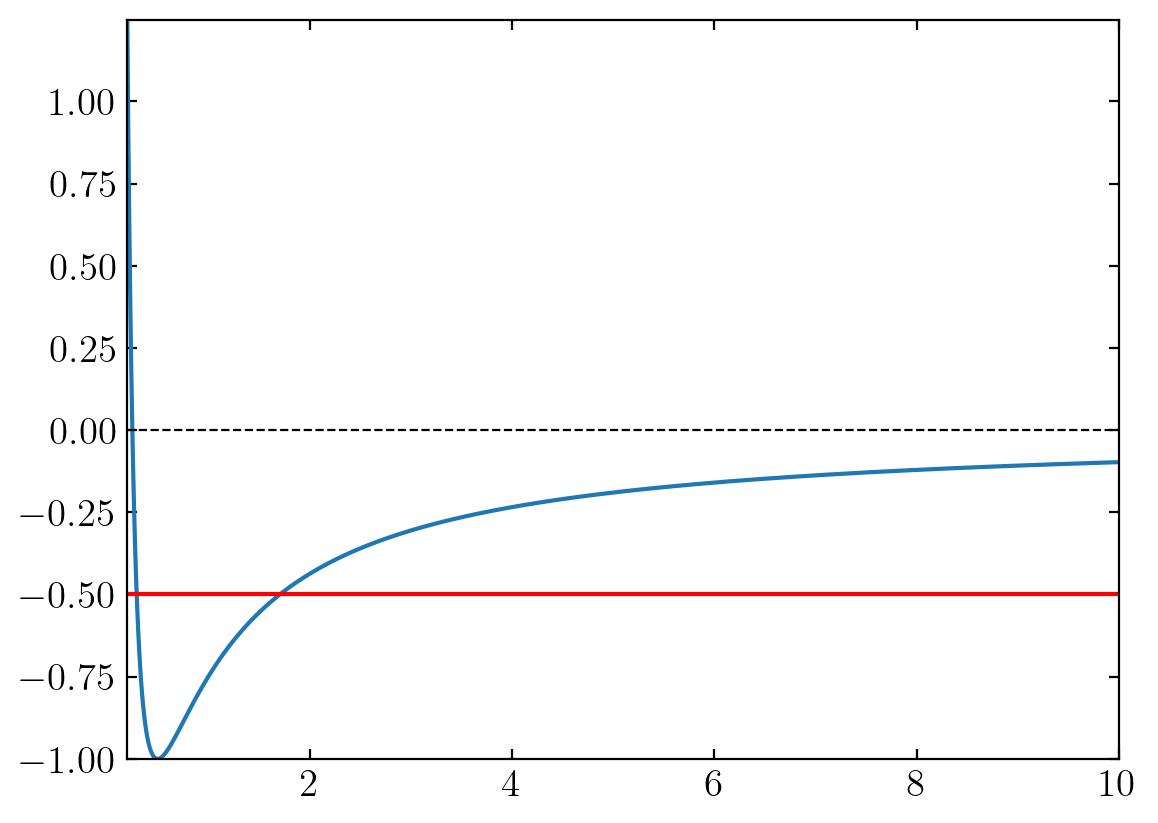

In [7]:
v_1 = np.sqrt(m_1["v_x"]**2 + m_1["v_y"]**2 + m_1["v_z"]**2)
v_2 = np.sqrt(m_2["v_x"]**2 + m_2["v_y"]**2 + m_2["v_z"]**2)

U = lambda r: -m_1["m"]*m_2["m"]/r + L**2/(2*mu*r**2)

G = 1
Ek_ = 1/2*m_1["m"]*v_1**2 + 1/2*m_2["m"]*v_2**2 
U_ = -(G*m_1["m"]*m_2["m"]/d)
E = Ek_ + U_  #dovrebbe conservarsi

r = np.linspace(.2,10,len(t))
plt.plot(r, U(r));
#plt.plot(d, U(d), 'red');
plt.axhline(y = 0, color = 'black', linestyle = 'dashed', lw = .8);
plt.axhline(y = E[-1], color = 'red');

This result highlights the stability of the system. We can see we don't expect circular orbits, this is because the intersection of the energy of the system (*red line*) and the potential represents the *pericenter* and the *apocenter* of the reduced mass in the which in this case are at different distances from the center.

One can then ask if the energy is effectively conserved throughout the entirety of the simulation. Here we show a very interesting result.

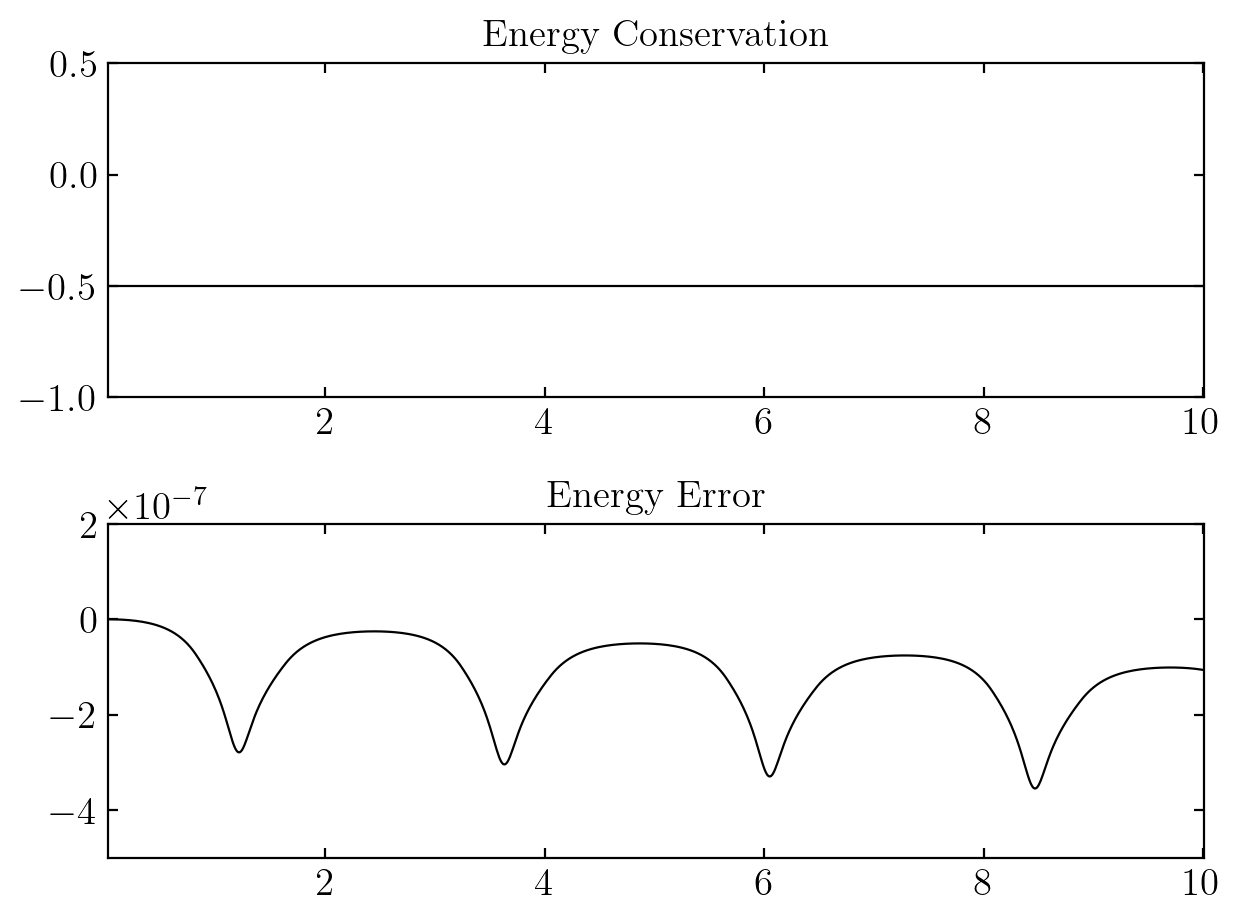

In [8]:
fig, axs = plt.subplots(2)
axs[0].plot(t, E, c = 'black', lw = .8)
axs[0].set_ylim([-1, .5])
axs[0].set_title("Energy Conservation")

axs[1].plot(t, E + .5, c = 'black', lw = .8)
axs[1].set_ylim([-5e-7, 2e-7])
axs[1].set_title("Energy Error");

fig.tight_layout(pad=1.0) 
plt.show()

Apparently **energy is conserved within a tiny error**, this probably is a numerical effect, most probably a truncation error of the estimates of the position. Probably due to the fact that the code is precise up to 5th order of the derivatives of the position.

## Eccentricity

To calculate the eccentricity from the equivalent system, we must identify the initial conditions for the general solution

$$ u(\theta) = Acos(\theta - \theta_0) + \frac{GM}{l^2} $$

The Cauchy and Neumann conditions chosen are

$$
\begin{cases}
    u(\theta=0) = 1 \\
    u'(\theta=0) = 0
\end{cases}
$$


The choice for the first equation is natural since $ u(0) = \dfrac{1}{d(t=0)} $ and $d(t = 0) = 1$ 

Let's see how we can solve for $A$ and $\theta_0$ keeping in mind that, thanks to the initial conditions of the 2-body problem, the term $ \frac{GM}{l^2} = 2$<br>

$$
\begin{cases}
    u(0)= A \cos(\theta_0) + 2 \\[3mm]
    u'(0) = A \sin(\theta_0)
\end{cases}
$$

From the first equation we find $A \cos(\theta_0)= -1$ while the second:

$$ u'(0) = \dfrac{du}{d\theta} = -\dfrac{1}{d^2}\ \dfrac{d(d)}{d\theta} = -\dfrac{1}{d^2} \ \dfrac{d(d)}{dt} \ \dfrac{dt}{d\theta} $$
<br>

At around $t = 0$ the system doesn't experience a great attraction velocity so $ \dfrac{dd}{dt}=0 $ then we have $ A \sin(\theta_0) = 0$


At the end then we will have the following system:

$$
\begin{cases}
    A \cos(\theta_0) = -1 \\[3mm]
    A \sin(\theta_0) = 0
\end{cases}
$$
<br>

Which yields $\theta_0 = \pi$ and $A = 1$

Eccentricity is defined by the physical formula 
$$ e = \frac{A l^2}{G M} $$

and if we consider $ A = 1 $ , $ G = 1 $ and we substitute the physical quantities with their corresponding value we will get: $ e = \frac{1}{2} . $
        
The eccentricity is less than 1 and for this reason we expect an elliptical orbit. The value returned as output is 0.5 as the theoretically derived value.

In [10]:
# assuming A = 1
A = 1
G = 1
e = A*l**2/(G*M[0])

print(e)

0.4998874957821996


## Trajectories

Finally we want to showcast the trajectories of this binary system and in particular we will give a ***geometrical demonstration*** of the eccentricity from these elliptic orbits.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

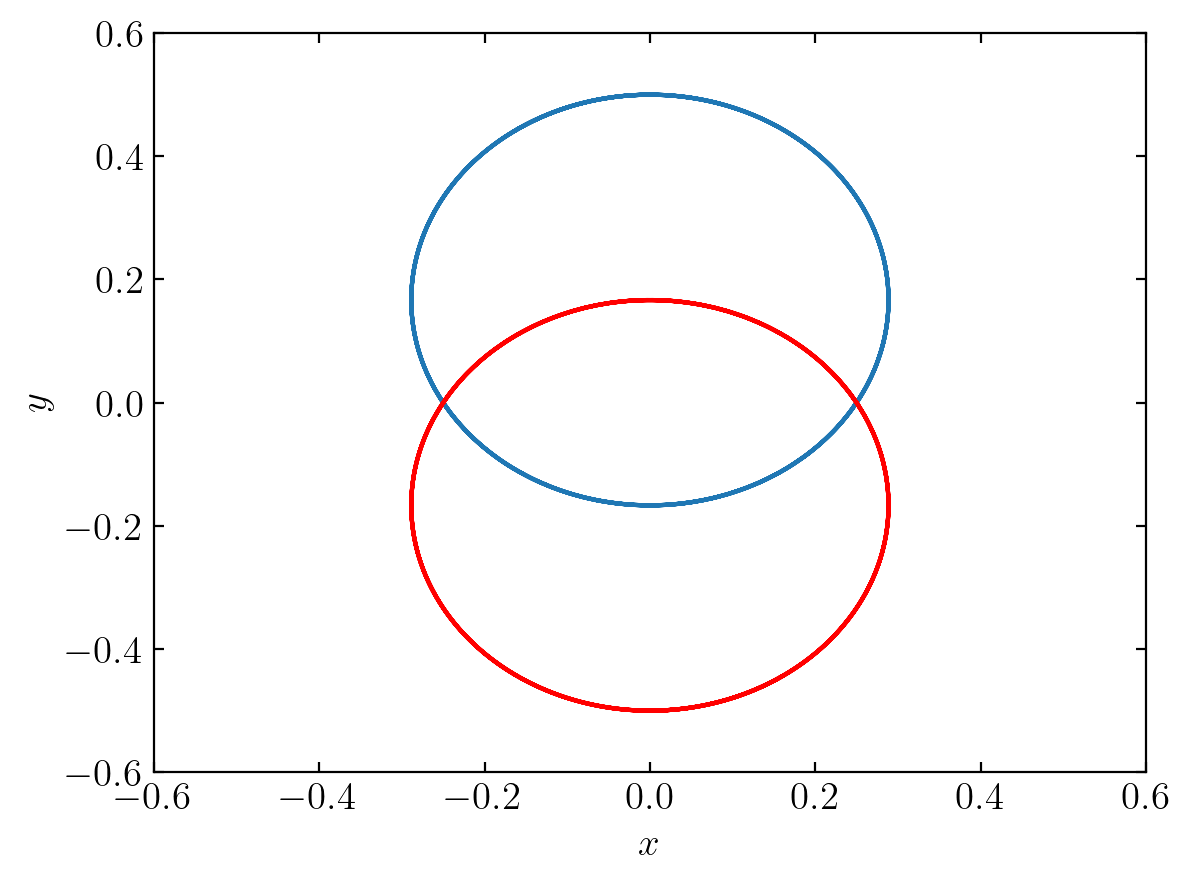

In [12]:
plt.plot(m_1["x"], m_1["y"]);
plt.plot(m_2["x"], m_2["y"], color = 'red');
plt.xlim(-.6,.6)
plt.ylim(-.6,.6);

plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

### Eccentricity of the orbits

Here we show how to infer the eccentricity from simple geometry as a further proof of the physics. We can simply calculate the eccentricity using the formula for an ellypse.
$$
e = \sqrt{1 - \dfrac{b^2}{a^2}}
$$

with a and b being the semimajior and semiminor axis respectively. To calculate them we simply take the minimum and maximum value of the coordinates of the two points along their path.

In [13]:
a_1 = (np.max(m_1["y"]) - np.min(m_1["y"]))
b_1 = (np.max(m_1["x"]) - np.min(m_1["x"]))
a_2 = (np.max(m_2["y"]) - np.min(m_2["y"]))
b_2 = (np.max(m_2["x"]) - np.min(m_2["x"]))

e1 = np.sqrt(1 - (b_1/a_1)**2)
e2 = np.sqrt(1 - (b_2/a_2)**2)

print(e1, e2)

0.4999646359647372 0.4999646359647372


Simple 3d plot of the trajectories

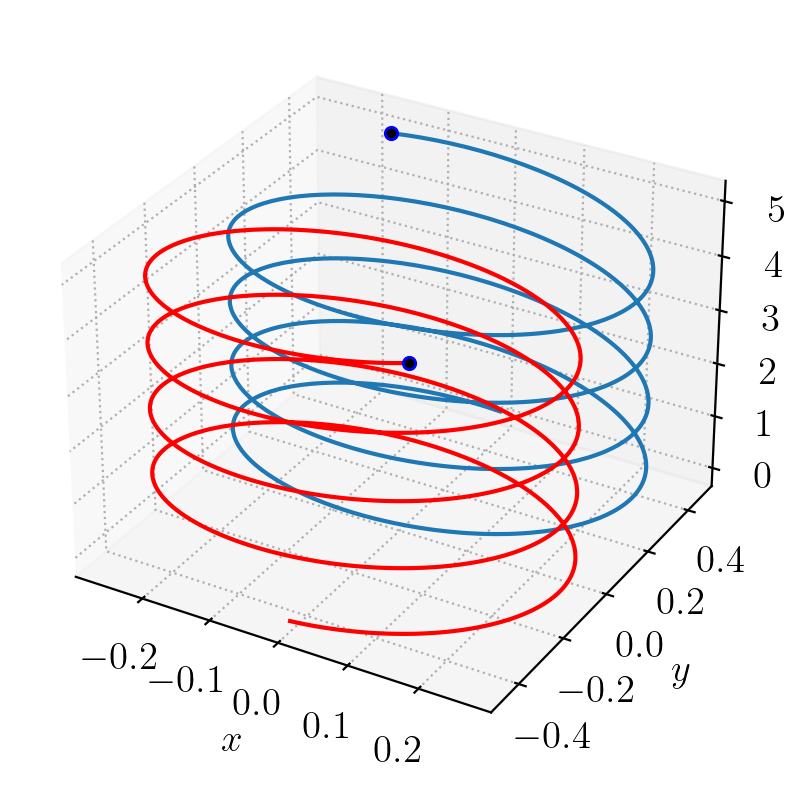

In [14]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(m_1["x"], m_1["y"], m_1["z"], zdir='z', label='curve in (x, y)');
ax.plot(m_2["x"], m_2["y"], m_2["z"], zdir='z', label='curve in (x, y)', color = 'red');
ax.scatter(m_1["x"][-1], m_1["y"][-1], m_1["z"][-1], 
               c='black', marker = 'o');    # Adding Constant Origin
ax.scatter(m_2["x"][-1], m_2["y"][-1], m_2["z"][-1], 
               c='black', marker = 'o');    # Adding Constant Origin

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$');

# Animation

Code for the animation shown.

In [15]:
x_1 = m_1["x"]
y_1 = m_1["y"]
z_1 = m_1["z"]

x_2 = m_2["x"]
y_2 = m_2["y"]
z_2 = m_2["z"]

numDataPoints = len(t)

In [16]:
def update(num):
    #print(f"{num} ", end="")
    
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(x_1[:num+1], y_1[:num+1], 
              z_1[:num+1])              # Updating Point Location
    ax.plot3D(x_2[:num+1], y_2[:num+1], 
              z_2[:num+1], c='red')
    ax.scatter(x_1[num], y_1[num], z_1[num], 
               c='black', marker='o')    # Adding Constant Origin
    ax.scatter(x_2[num], y_2[num], z_2[num], 
               c='black', marker='o')    # Adding Constant Origin
    
    #ax.plot3D(x_1[0], y_1[0], z_1[0], marker='o', c='black')    # Setting Axes Limits
    #ax.plot3D(x_2[0], y_2[0], z_2[0], marker='o', c='black')    # Setting Axes Limits
    
    #ax.set_xlim3d([-.6, .6])
    #ax.set_ylim3d([-.6, .6])
    #ax.set_zlim3d([0, 5])

    # Adding Figure Labels
    #ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 #decimals=2)) + ' sec')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$');

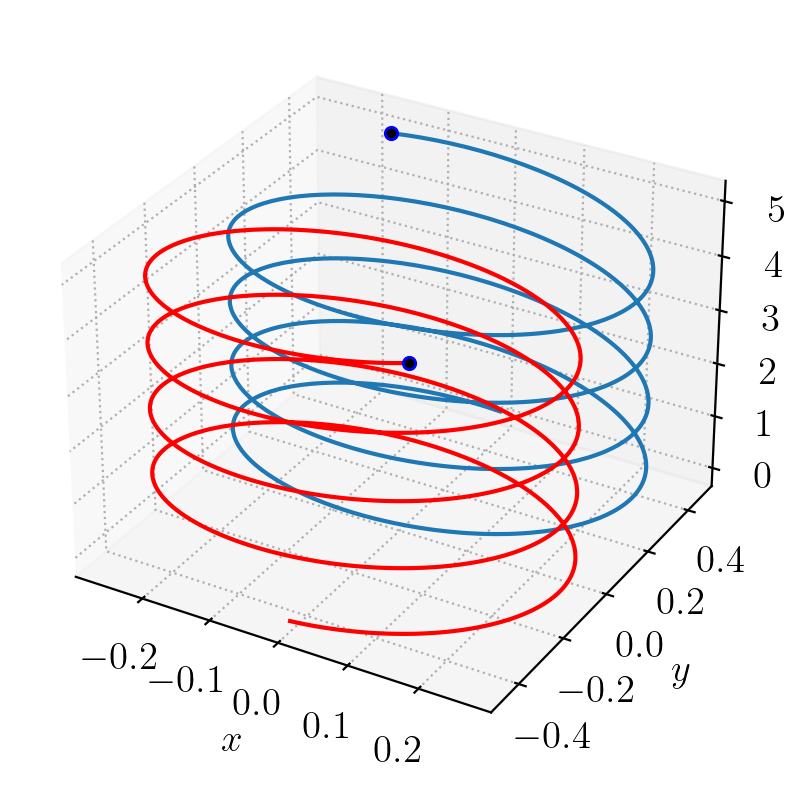

In [17]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, update, interval=10,   
                                   frames=numDataPoints)

# Saving the Animation
f = r"animation1.gif"
writergif = animation.PillowWriter(fps=60)
line_ani.save(f, writer=writergif)

plt.show()